# Лабораторная работа 4 <br>
# Модель YOLO для обнаружения объектов на изображениях

Загрузка предварительно обученной модели

In [58]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# Задание А


0: 640x640 2 cats, 2 dogs, 177.0ms
Speed: 6.0ms preprocess, 177.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


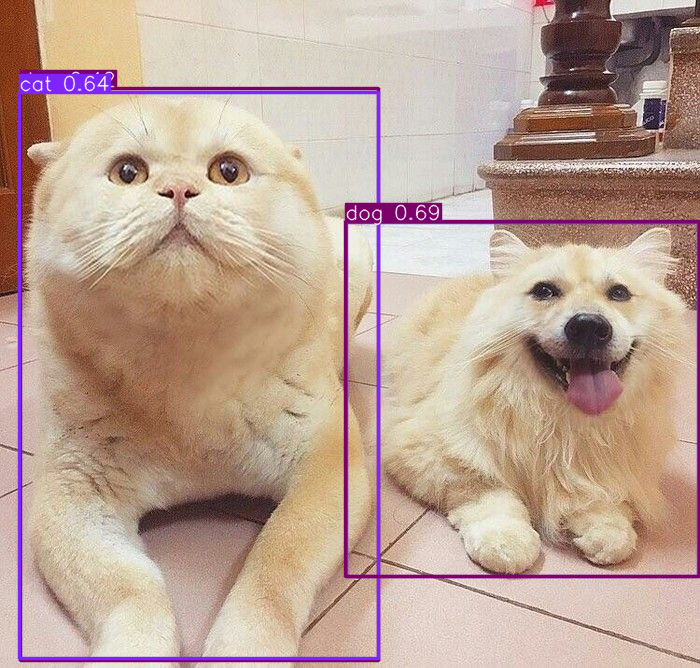

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [59]:
results = model(["DOGCAT.jpg"])
result=results[0]
boxes = result.boxes
obb = result.obb
result.show()
print(model.names)
for box in boxes:
  print(result.names[box.cls.item()])
  print(round(box.conf.item(),2))
  print([round(el,2) for el in box.xyxy.tolist()[0]])

# Задание С

Обучение модели 

In [3]:
results = model.train(data="C:\\Users\\dima\\Desktop\\vagons_dataset\\data.yaml", epochs=10, imgsz=640, amp=True, batch=32)

New https://pypi.org/project/ultralytics/8.3.21 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.4  Python-3.12.7 torch-2.4.1+cpu CPU (AMD Ryzen 5 7530U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:\Users\dima\Desktop\vagons_dataset\data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

train: Scanning C:\Users\dima\Desktop\vagons_dataset\train\labels.cache... 2093 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2093/2093 [00:00<?, ?it/s]Scanning C:\Users\dima\Desktop\vagons_dataset\train\labels.cache... 2093 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2093/2093 [00:00<?, ?it/s]


WARNING  Box and segment counts should be equal, but got len(segments) = 5890, len(boxes) = 9419. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning C:\Users\dima\Desktop\vagons_dataset\valid\labels.cache... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<?, ?it/s]Scanning C:\Users\dima\Desktop\vagons_dataset\valid\labels.cache... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<?, ?it/s]


WARNING  Box and segment counts should be equal, but got len(segments) = 564, len(boxes) = 901. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.561       2.49      1.735         46        640: 100%|██████████| 66/66 [12:00<00:00, 10.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:31<00:00,  7.96s/it]


                   all        196        901       0.83       0.16      0.328      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.551      1.907      1.697         51        640: 100%|██████████| 66/66 [13:22<00:00, 12.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:33<00:00,  8.26s/it]


                   all        196        901      0.452      0.416      0.385      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.498       1.71      1.635         53        640: 100%|██████████| 66/66 [13:41<00:00, 12.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:28<00:00,  7.19s/it]


                   all        196        901      0.684      0.347      0.351      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G       1.48      1.611      1.621         45        640: 100%|██████████| 66/66 [12:06<00:00, 11.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:28<00:00,  7.18s/it]


                   all        196        901      0.661      0.417      0.398      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.417      1.488      1.578         47        640: 100%|██████████| 66/66 [12:09<00:00, 11.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:28<00:00,  7.08s/it]


                   all        196        901      0.447      0.461      0.405      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.364      1.396      1.521         65        640: 100%|██████████| 66/66 [12:08<00:00, 11.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:27<00:00,  7.00s/it]


                   all        196        901      0.468      0.512      0.443      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.299      1.302      1.481         49        640: 100%|██████████| 66/66 [12:13<00:00, 11.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:27<00:00,  6.94s/it]


                   all        196        901      0.518      0.454      0.456      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.255      1.238      1.447         49        640: 100%|██████████| 66/66 [12:08<00:00, 11.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:27<00:00,  6.90s/it]


                   all        196        901       0.53      0.511      0.485      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.208      1.174       1.41         49        640: 100%|██████████| 66/66 [12:11<00:00, 11.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:27<00:00,  6.91s/it]


                   all        196        901      0.468      0.564      0.491      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.159      1.117      1.371         64        640: 100%|██████████| 66/66 [12:07<00:00, 11.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:27<00:00,  6.88s/it]


                   all        196        901      0.462      0.541      0.482      0.306

10 epochs completed in 2.155 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 5.5MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.4  Python-3.12.7 torch-2.4.1+cpu CPU (AMD Ryzen 5 7530U with Radeon Graphics)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.61s/it]


                   all        196        901      0.464      0.559       0.49      0.309
                  body        194        324      0.629      0.873      0.865      0.602
              coupling         92        110      0.318      0.233      0.173     0.0926
                wheels        194        467      0.447       0.57      0.434      0.233
Speed: 4.1ms preprocess, 99.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\train2


График изменения точности модели на валидационной выборке в зависимости от эпохи обучения

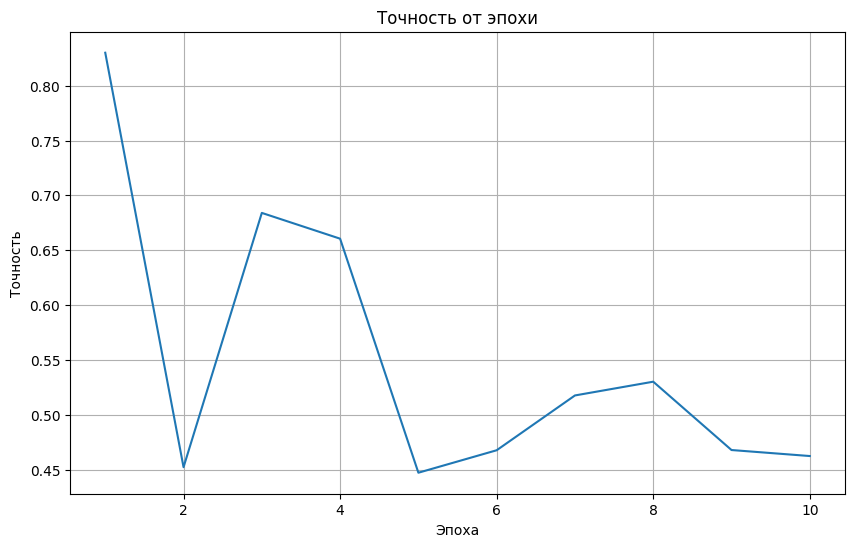

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('C:\\Users\\dima\\Desktop\\vagons_dataset\\runs\\detect\\train2\\results.csv', sep=',')
df = df.rename(columns=lambda x: x.strip())

epoch = [i for i in range(1, 11)]
pre = df['metrics/precision(B)']

plt.figure(figsize=(10, 6))
plt.plot(epoch, pre)

plt.title('Точность от эпохи')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.grid(True)

plt.show()


Лучшую модель, полученную в рамках обучения.

In [42]:
best = YOLO('runs\\detect\\train2\\weights\\best.pt')

In [43]:
best.names

{0: 'body', 1: 'coupling', 2: 'wheels'}

Предсказание для набора из 5 
изображений, для каждого из них графический результат 
(аналогично последнему пункту задания а)

train\\images\449bc_jpeg_jpg.rf.a0489ccc03d84119ab372ddce52fc3bc.jpg



0: 640x640 4 bodys, 124.5ms
Speed: 24.7ms preprocess, 124.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


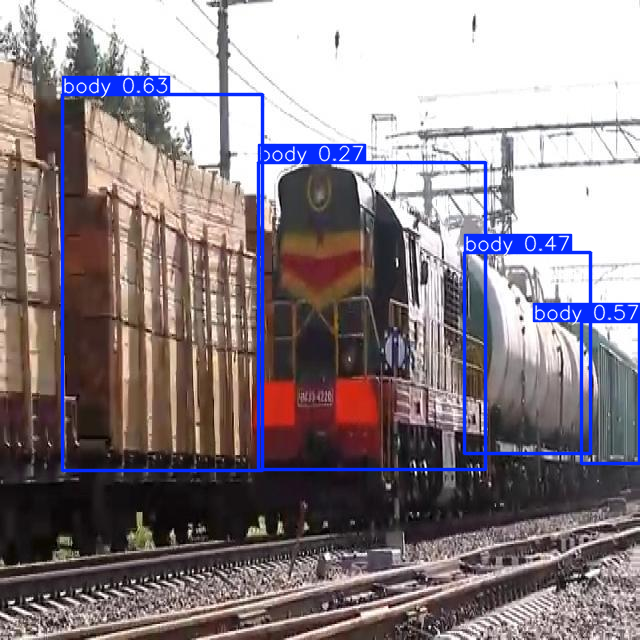

train\\images\zisterna_1103b_jpg.rf.300c1d6868f90f8d307276afaa37a6df.jpg

0: 640x640 1 body, 1 coupling, 3 wheelss, 90.0ms
Speed: 2.2ms preprocess, 90.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


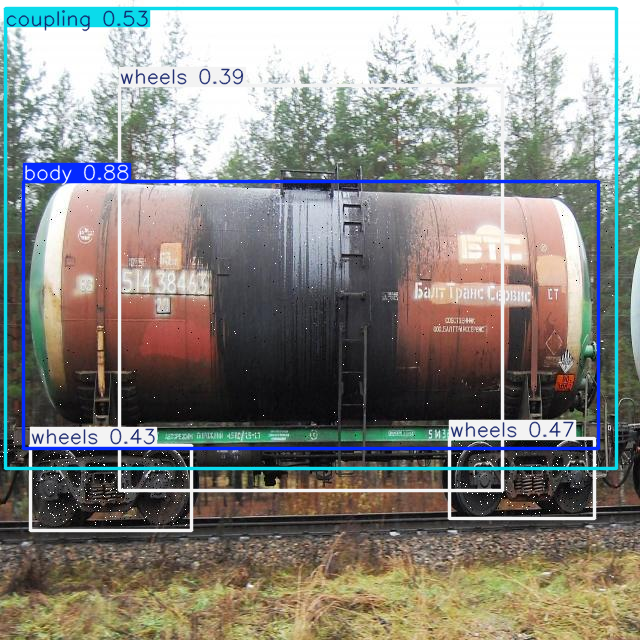

train\\images\vagon_0704b_jpg.rf.70aa7aefabffdd73a0c50ccbcb7cad1e.jpg

0: 640x640 3 bodys, 1 wheels, 148.0ms
Speed: 8.0ms preprocess, 148.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


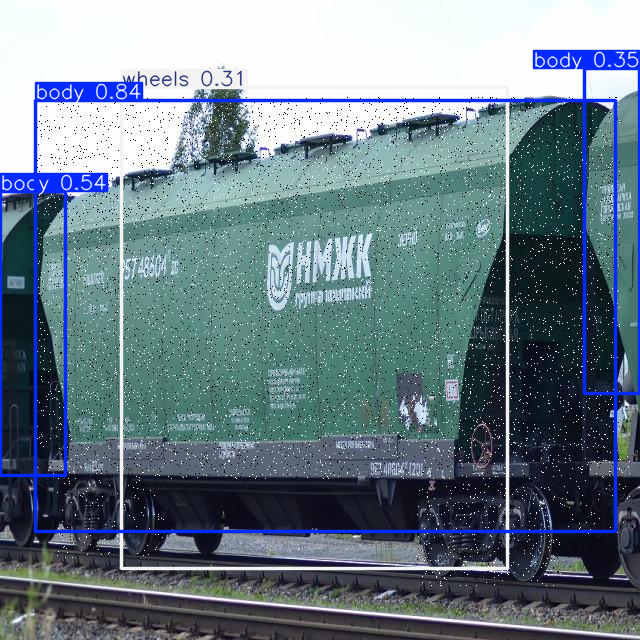

train\\images\a1fd42ad7682_jpg.rf.5efa9a51d5b155a1b3b4fdc6c6760e34.jpg

0: 640x640 1 body, 103.0ms
Speed: 3.1ms preprocess, 103.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


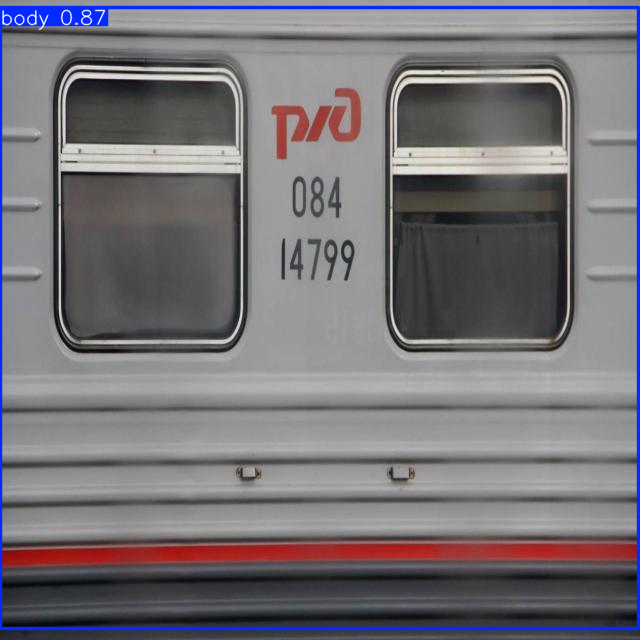

train\\images\d0b0c3f90363_jpg.rf.76c6d9cc11aa03bc1f6150461c79be0b.jpg

0: 640x640 2 bodys, 1 coupling, 3 wheelss, 120.4ms
Speed: 4.3ms preprocess, 120.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


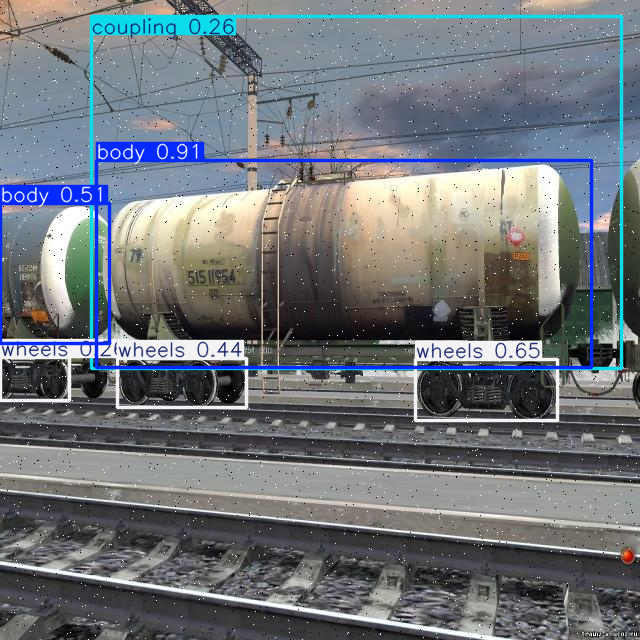

In [56]:
from random import shuffle
from glob import glob

files = glob(r"train\\images\\*.jpg")
shuffle(files)
files_ = files[:5]
for file in files_:
    print(file)
    result = results[0]
    result_ = best([f"{file}"])
    if result_:
        result_ = result_[0]
        boxes = result_.boxes
        obb = result_.obb 
        result_.show()

# Задание а